In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

from sklearn.metrics import make_scorer, roc_curve, auc

# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

# gonna use 5 models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

In [2]:
# Load data from file
df = pd.read_csv('../data/df_model_final.csv')

## 1. A Brief Look

In [3]:
# Display the first 20 columns and 10 rows 
df.iloc[:, :20].head(10)

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,freq_D_last_14,freq_D_last_30,freq_S_last_1,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,rec_P,rec_D,rec_S
0,34509854,1,7,11,11,11,144,0,0,0,0,0,0,0,0,0,0,0,0,0
1,56890349,0,41,141,220,509,1060,0,0,0,0,0,0,0,0,1,1,0,0,13
2,168552245,1,0,0,0,0,101,0,0,0,0,0,0,0,0,0,8,20,0,29
3,168553859,1,0,0,0,0,242,0,0,0,0,1,0,0,0,0,0,28,29,0
4,168556386,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,29,0,29
5,168556642,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,29,0,29
6,168577890,1,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,29,0,0
7,168590270,0,0,20,20,36,134,0,0,0,0,5,0,0,0,0,2,1,29,28
8,168605933,1,0,0,0,0,22,0,0,0,0,2,0,0,0,0,1,29,29,29
9,168613400,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,29,0,29


In [4]:
# display column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9765 entries, 0 to 9764
Data columns (total 34 columns):
uid                   9765 non-null int64
label                 9765 non-null int64
freq_P_last_1         9765 non-null int64
freq_P_last_3         9765 non-null int64
freq_P_last_7         9765 non-null int64
freq_P_last_14        9765 non-null int64
freq_P_last_30        9765 non-null int64
freq_D_last_1         9765 non-null int64
freq_D_last_3         9765 non-null int64
freq_D_last_7         9765 non-null int64
freq_D_last_14        9765 non-null int64
freq_D_last_30        9765 non-null int64
freq_S_last_1         9765 non-null int64
freq_S_last_3         9765 non-null int64
freq_S_last_7         9765 non-null int64
freq_S_last_14        9765 non-null int64
freq_S_last_30        9765 non-null int64
rec_P                 9765 non-null int64
rec_D                 9765 non-null int64
rec_S                 9765 non-null int64
device_type           9765 non-null int64
play_time_l

In [5]:
# Show summary stats
df.describe()

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,...,play_time_last_14,play_time_last_30,rela_freq_last_1,rela_freq_last_3,rela_freq_last_7,rela_freq_last_14,rela_freq_last_30,play_1_over_play_7,play_1_over_down_1,play_1_over_down_7
count,9.765000e+03,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,...,9765.000000,9765.000000,9765.000000,9765.000000,9765.00000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000
mean,1.675510e+08,0.684588,3.137839,10.990169,25.026728,51.659805,154.299539,0.115719,0.283666,0.789042,...,5315.565376,14720.409675,1.100973,3.371326,8.20809,17.196006,46.380850,0.037492,0.270028,0.484953
std,1.157172e+07,0.464704,16.832520,46.045467,92.816827,174.172292,344.701854,3.334905,4.792245,10.927105,...,17906.663336,36146.821920,5.306717,13.650453,29.86432,57.085934,113.300535,0.148160,3.869119,4.886346
min,2.626270e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.686221e+08,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,463.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.687434e+08,1.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,...,0.000000,2727.000000,0.000000,0.000000,0.00000,0.000000,8.000000,0.000000,0.000000,0.000000
75%,1.688345e+08,1.000000,0.000000,0.000000,3.000000,19.000000,146.000000,0.000000,0.000000,0.000000,...,1597.000000,12443.000000,0.000000,0.000000,0.00000,4.000000,38.000000,0.000000,0.000000,0.000000
max,1.689410e+08,1.000000,498.000000,1028.000000,2060.000000,4151.000000,7464.000000,277.000000,282.000000,625.000000,...,461663.000000,796549.000000,108.000000,238.000000,553.00000,1122.000000,2586.000000,1.000000,218.000000,218.000000


### Extreme Value Double Check
We only check frequency of playing music for an example. As a matter of factor, the out-lier detection of other types of features has been done in the last feature generation jupyter notebook. Therea re

In [6]:
# frequency of play check: if we assume average length of song is 4min, and we play songs one to the end one 
# one after one, 
# 
print('''The maximum resonable play time (in minutes) per day for last 14 days is {:.2f}. \n
The maximum resonable play time (in minutes) per day for last 30 days is {:.2f}. \n
One day has {} minutes.'''.format(4151/14*4, 7464/30*4, 24*60))

The maximum resonable play time (in minutes) per day for last 14 days is 1186.00. 

The maximum resonable play time (in minutes) per day for last 30 days is 995.20. 

One day has 1440 minutes.


Many features has a lot of missing values, namely zeros. The proportion of 0s of some features is nearly close to 1. Obviously, that's due to how we generate the features.
<font color = red> This phenomenon suggests machine learning algorithms insensitive to missing values.

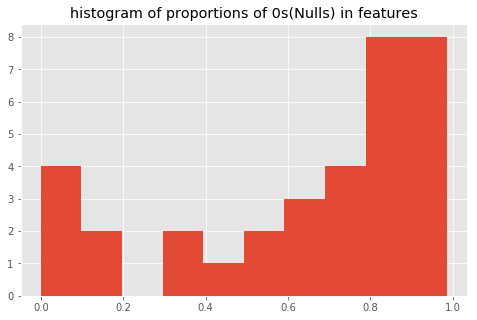

In [7]:
# histogram or proportions of nulls in each feature
prop_0s = df[df == 0].count(axis=0)/len(df.index)

plt.figure(figsize=(8,5))
prop_0s.hist()
plt.title('histogram of proportions of 0s(Nulls) in features')
plt.show()

----
---
## 2. Data Preparation and Correlation Plot

### One-Hot Encoding of device type

In [8]:
df['device_type_1'] = (df['device_type'] == 1).astype(int)
df['device_type_2'] = (df['device_type'] == 2).astype(int)

### X and y

In [9]:
selected_features = list(df.columns.values)
selected_features.remove('uid')
selected_features.remove('label')
selected_features.remove('device_type')
selected_features

['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'freq_S_last_1',
 'freq_S_last_3',
 'freq_S_last_7',
 'freq_S_last_14',
 'freq_S_last_30',
 'rec_P',
 'rec_D',
 'rec_S',
 'play_time_last_1',
 'play_time_last_3',
 'play_time_last_7',
 'play_time_last_14',
 'play_time_last_30',
 'rela_freq_last_1',
 'rela_freq_last_3',
 'rela_freq_last_7',
 'rela_freq_last_14',
 'rela_freq_last_30',
 'play_1_over_play_7',
 'play_1_over_down_1',
 'play_1_over_down_7',
 'device_type_1',
 'device_type_2']

In [10]:
X = df[selected_features]
y = df['label']
X.shape, y.shape

((9765, 33), (9765,))

### Correlation Plot
As can be seen below, many features are correlated due to the generation.

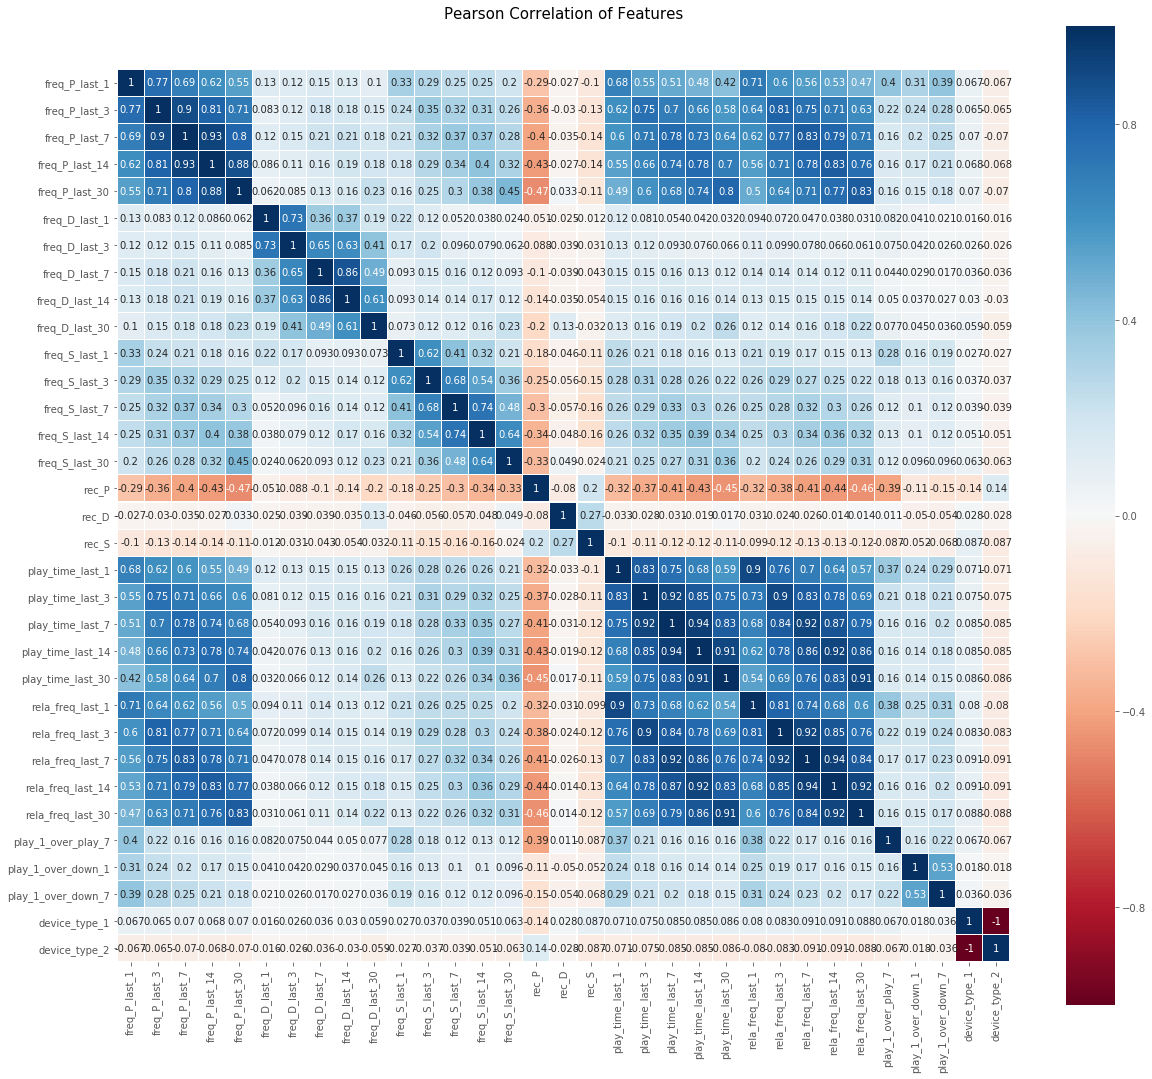

In [11]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,18))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### Pairplot
For example plot "churn" against the frequency of play, features that might be very important. 

Frequency features do have influence on churn prediction. Roughly speaking, the more the churn and stay detach, the stronger the corrleation is. However, how much the effect exactly is requires the feature importance analysis.

<Figure size 720x576 with 0 Axes>

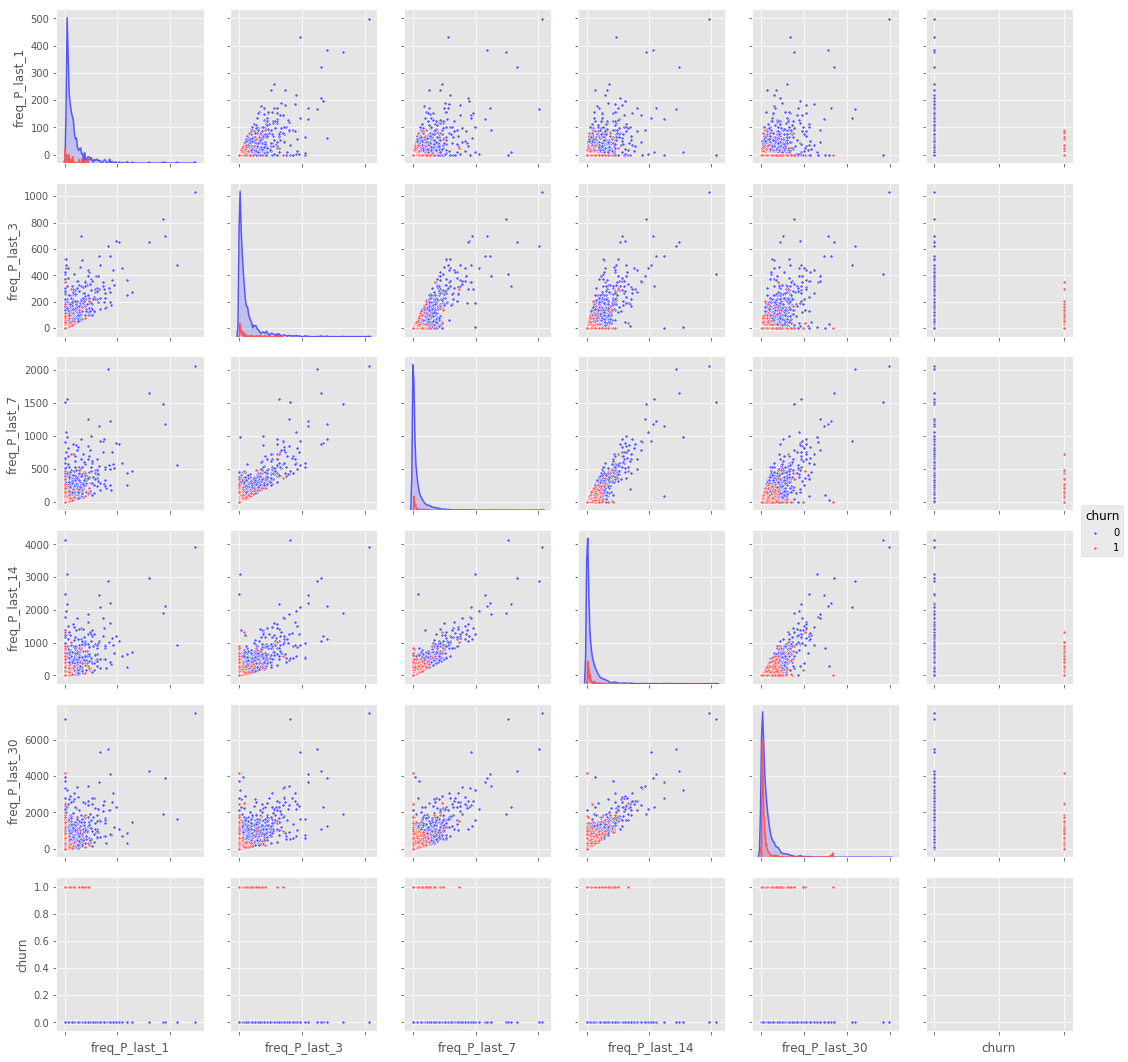

In [12]:
X_P = X.filter(regex='freq_P').copy()
X_P['churn'] = y
plt.figure(figsize=(10,8))
g = sns.pairplot(X_P, hue='churn', palette = 'seismic'
                 ,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
plt.show()

<Figure size 720x576 with 0 Axes>

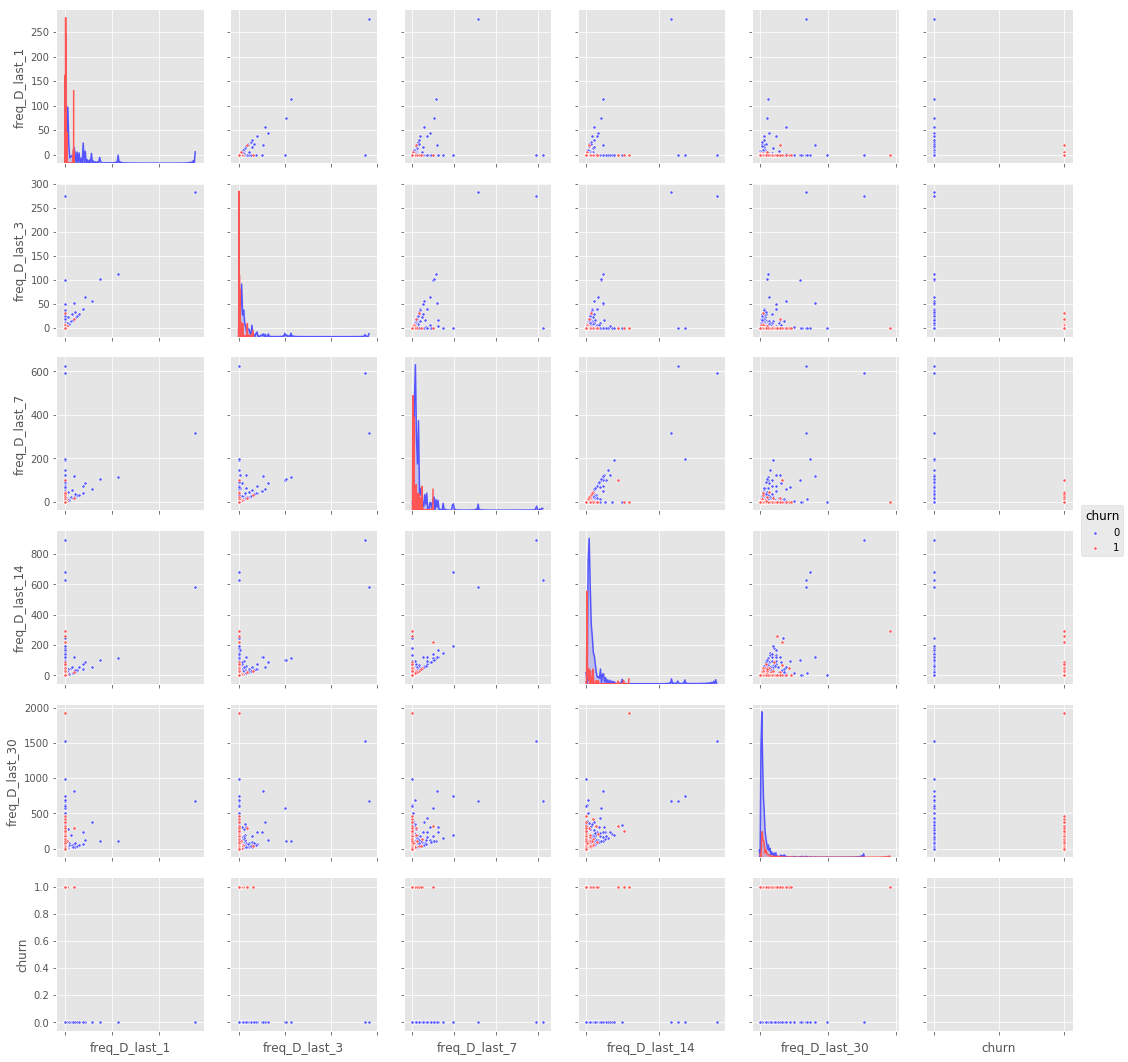

In [13]:
X_P = X.filter(regex='freq_D').copy()
X_P['churn'] = y
plt.figure(figsize=(10,8))
g = sns.pairplot(X_P, hue='churn', palette = 'seismic'
                 ,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
plt.show()

<Figure size 720x576 with 0 Axes>

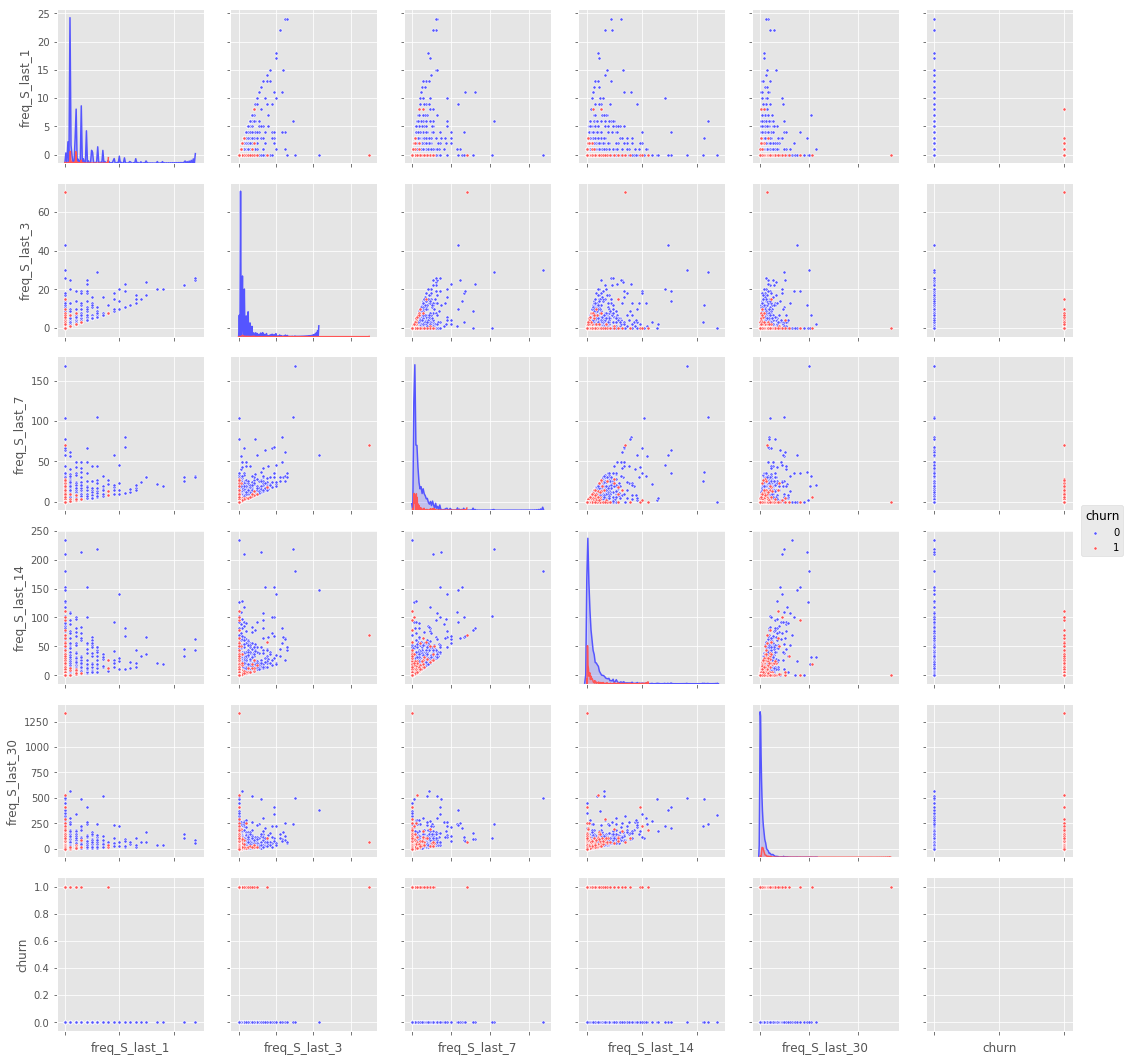

In [14]:
X_P = X.filter(regex='freq_S').copy()
X_P['churn'] = y
plt.figure(figsize=(10,8))
g = sns.pairplot(X_P, hue='churn', palette = 'seismic'
                 ,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
plt.show()

---
---
## 3. Churn Prediction 

### Train-test Split 

In [15]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

###  Define Some Functions

In [16]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    %matplotlib inline
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')

    print(all_metrics)

### First-Level Model
#### logistic model 

In [17]:
model_seed = 101

              train      test
metrics                      
AUC        0.910072  0.928217
Accuracy   0.861111  0.880184
Precision  0.888707  0.899049
Recall     0.911754  0.927547
f1-score   0.900083  0.913076


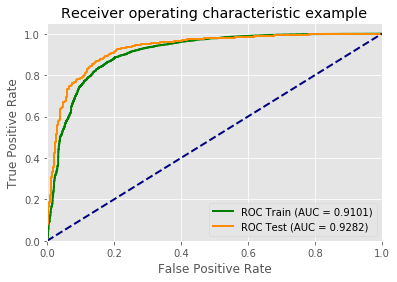

In [18]:
lr_clf = LogisticRegression(C=.1, penalty='l1')
lr_clf.fit(X_train, y_train)
train_test_model(lr_clf, X_train, y_train, X_test, y_test)

In [19]:
lr_param_grid = {'C': [0.1, 0.5, 1, 5, 10], 
                 'penalty': ['l1', 'l2']
                }
lr_grid_clf = LogisticRegression()
lr_grid_obj = GridSearchCV(lr_grid_clf, lr_param_grid, cv=5, scoring='roc_auc')
lr_grid_obj.fit(X_train, y_train)
lr_best_clf = lr_grid_obj.best_estimator_
lr_best_clf.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
cross_val_score(lr_best_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9079604348731012

In [21]:
lr_man_param = {'C': .5,
               'penalty': 'l1'}
lr_man_clf = LogisticRegression(**lr_man_param)
cross_val_score(lr_man_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9079604348731012

              train      test
metrics                      
AUC        0.910308  0.928640
Accuracy   0.860471  0.880696
Precision  0.890596  0.901471
Recall     0.908209  0.925283
f1-score   0.899316  0.913222


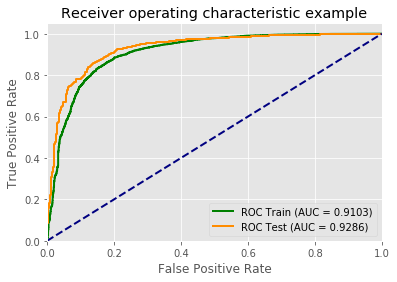

In [22]:
train_test_model(lr_best_clf, X_train, y_train, X_test, y_test)

#### Feature Importances of Logistic Regression 

In [23]:
# lr_features = lr_best_clf.coef_

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

lr_best_clf_standardized = lr_grid_obj.best_estimator_
lr_best_clf_standardized.fit(scaler.transform(X_train), y_train)
lr_features_standardized = lr_best_clf_standardized.coef_

#### Fandom Forests

In [25]:
# Choose some parameter combinations to try
rf_param_grid = {'n_estimators': [50,100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [5,10,15], 
              'random_state': [model_seed],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }
rf_grid_clf = RandomForestClassifier()

# Run the grid search
# read theory
rf_grid_obj = GridSearchCV(rf_grid_clf, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_best_clf = rf_grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_best_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [26]:
rf_features = rf_best_clf.feature_importances_

In [27]:
cross_val_score(rf_best_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9170961292761017

In [28]:
rf_man_param = {'n_estimators': 200, 
              'max_features': 'auto', 
              'criterion': 'gini',
              'max_depth': 10, 
              'random_state': model_seed,
              'min_samples_split': 6,
              'min_samples_leaf': 2,
              'n_jobs':-1
             }
rf_man_clf = RandomForestClassifier(**rf_man_param)
cross_val_score(rf_man_clf, X_train, y_train, 
                      cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9170961292761017

              train      test
metrics                      
AUC        0.952451  0.933615
Accuracy   0.912954  0.871992
Precision  0.914600  0.888087
Recall     0.963060  0.928302
f1-score   0.938204  0.907749


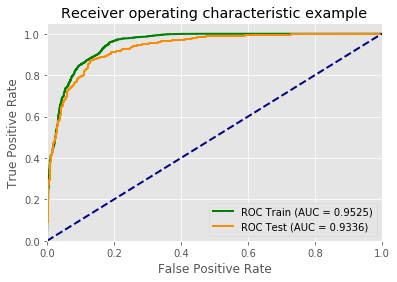

In [29]:
train_test_model(rf_best_clf, X_train, y_train, X_test, y_test)

#### AdaBoost

In [30]:
# Choose some parameter combinations to try
ab_param_grid = {'n_estimators': [50,100, 150], 
                 'learning_rate': [.15, .1, .05],
                 'random_state': [model_seed]
                }

ab_grid_clf = AdaBoostClassifier()


# Run the grid search
# read theory
ab_grid_obj = GridSearchCV(ab_grid_clf, ab_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
ab_grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_best_clf = ab_grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_best_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=101)

In [31]:
ab_features = ab_best_clf.feature_importances_

In [32]:
cross_val_score(ab_best_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9101650195446144

In [33]:
ab_man_param = {
    'n_estimators': 100,
    'learning_rate': 0.05,
    'random_state': model_seed
}
ab_man_clf = AdaBoostClassifier(**ab_man_param)
cross_val_score(ab_man_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9100361339629629

              train      test
metrics                      
AUC        0.913425  0.928584
Accuracy   0.861751  0.873528
Precision  0.882143  0.892285
Recall     0.921642  0.925283
f1-score   0.901460  0.908485


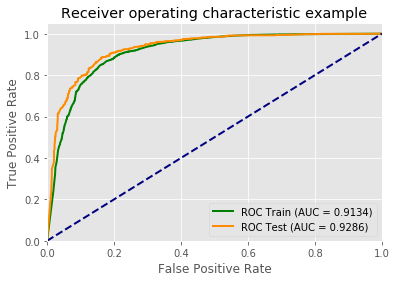

In [34]:
train_test_model(ab_best_clf, X_train, y_train, X_test, y_test)

#### GBDT

In [35]:
# Choose some parameter combinations to try
gb_param_grid = {'n_estimators': [50,100], 
              'max_depth': [3, 4, 6], 
              'learning_rate': [.15, .1, .05],
              'subsample': [0.8, 0.9], 
              'max_features': [0.8, 0.9],
              'random_state': [model_seed],
             }

gb_grid_clf = GradientBoostingClassifier()


# Run the grid search
# read theory
gb_grid_obj = GridSearchCV(gb_grid_clf, gb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gb_grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_best_clf = gb_grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_best_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=0.8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=101, subsample=0.8, verbose=0,
              warm_start=False)

In [36]:
gb_features = gb_best_clf.feature_importances_

In [37]:
cross_val_score(gb_best_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9150326180415931

In [38]:
gb_man_param = {
    'n_estimators': 100,
    'max_depth': 4,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'max_features':0.8,
    'random_state': model_seed
}
gb_man_clf = GradientBoostingClassifier(**gb_man_param)
cross_val_score(gb_man_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9143482219239643

              train      test
metrics                      
AUC        0.955551  0.932364
Accuracy   0.917947  0.873528
Precision  0.917537  0.889451
Recall     0.967351  0.929057
f1-score   0.941785  0.908822


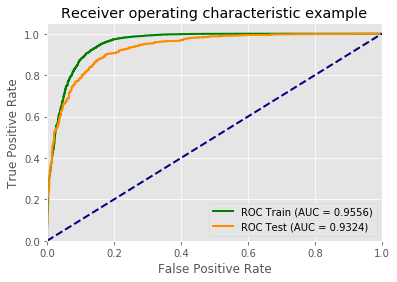

In [39]:
train_test_model(gb_best_clf, X_train, y_train, X_test, y_test)

#### XGBoost

In [40]:
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 6],
    'learning_rate': [.05, .1, .15],
    'subsample': [.8, .9],
    'colsample_bytree': [.2, .5, .8],
    'n_jobs': [-1],
    'seed': [model_seed]
}

xgb_grid_clf = XGBClassifier()

# Run the grid search
# read theory
xgb_grid_obj = GridSearchCV(xgb_grid_clf, xgb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_best_clf = xgb_grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_best_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=0.9)

In [41]:
xgb_features = xgb_best_clf.feature_importances_

In [42]:
cross_val_score(xgb_best_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9160736428884713

In [43]:
xgb_man_param = {
    'n_estimators': 150,
    'max_depth': 4,
    'learning_rate': .05,
    'subsample': .9,
    'colsample_bytree': .8,
    'n_jobs': -1,
    'seed': model_seed
}

xgb_man_clf = XGBClassifier(**xgb_man_param)
cross_val_score(xgb_man_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9160736428884713

/Users/LZQ/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/LZQ/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



              train      test
metrics                      
AUC        0.935618  0.933408
Accuracy   0.884537  0.871992
Precision  0.896902  0.885305
Recall     0.939739  0.932075
f1-score   0.917821  0.908088


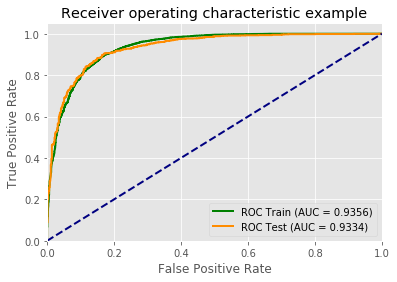

In [44]:
train_test_model(xgb_best_clf, X_train, y_train, X_test, y_test)

### Feature Importances of Model

In [45]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['lr_imp'] = lr_features_standardized.reshape(-1, 1)
df_feature_importance['rf_imp'] = rf_features
df_feature_importance['ab_imp'] = ab_features
df_feature_importance['gb_imp'] = gb_features
df_feature_importance['xgb_imp'] = xgb_features

In [46]:
df_feature_importance.head(10)

,feature,lr_imp,rf_imp,ab_imp,gb_imp,xgb_imp
0,freq_P_last_1,-0.643395,0.012117,0.08,0.007697,0.018367
1,freq_P_last_3,0.197112,0.046257,0.02,0.012882,0.015306
2,freq_P_last_7,-0.412749,0.100228,0.14,0.058727,0.033673
3,freq_P_last_14,0.000000,0.095028,0.00,0.048942,0.037245
4,freq_P_last_30,-0.217964,0.028560,0.04,0.075437,0.095918
5,freq_D_last_1,-0.165092,0.000179,0.00,0.000394,0.003061
6,freq_D_last_3,-0.059240,0.000567,0.00,0.002251,0.004592
7,freq_D_last_7,-0.109643,0.001682,0.00,0.003531,0.005102
8,freq_D_last_14,0.054618,0.004469,0.00,0.008458,0.017347
9,freq_D_last_30,0.024624,0.013534,0.06,0.039074,0.062755


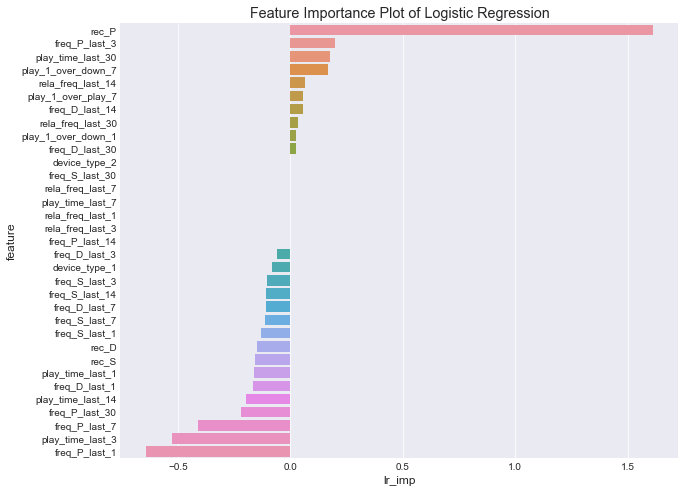

In [47]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(y = 'feature', x = 'lr_imp', 
            data = df_feature_importance.sort_values('lr_imp', ascending = False))
plt.title('Feature Importance Plot of Logistic Regression')
plt.show()

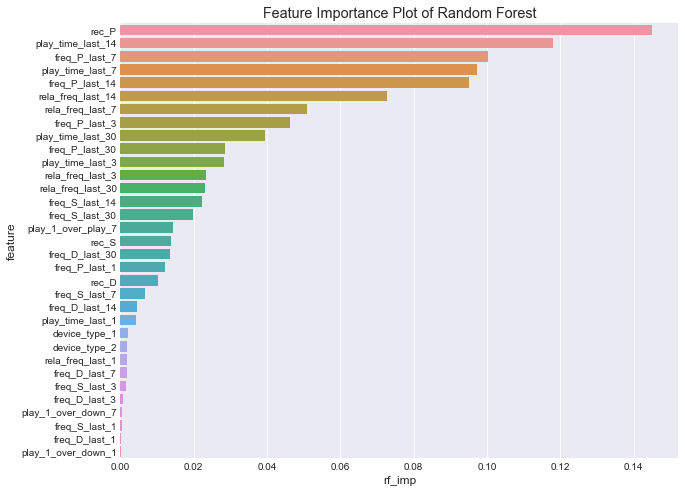

In [48]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(y = 'feature', x = 'rf_imp', 
            data = df_feature_importance.sort_values('rf_imp', ascending = False))
plt.title('Feature Importance Plot of Random Forest')
plt.show()

Text(0.5,1,'Feature Importance Plot of AdaBoost')

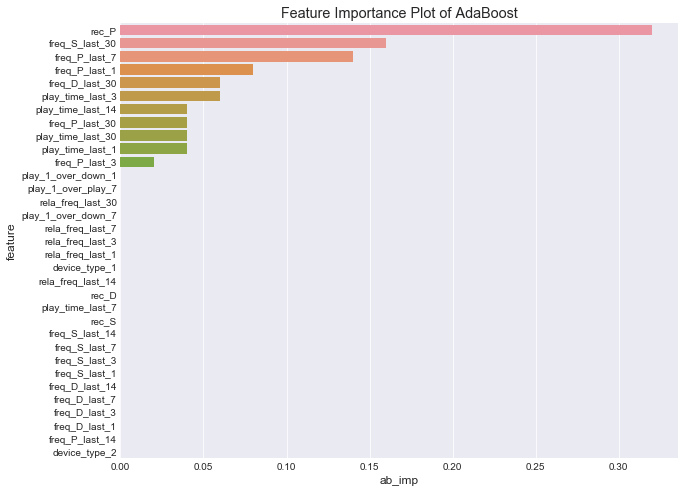

In [49]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(y = 'feature', x = 'ab_imp', 
            data = df_feature_importance.sort_values('ab_imp', ascending = False))
plt.title('Feature Importance Plot of AdaBoost')

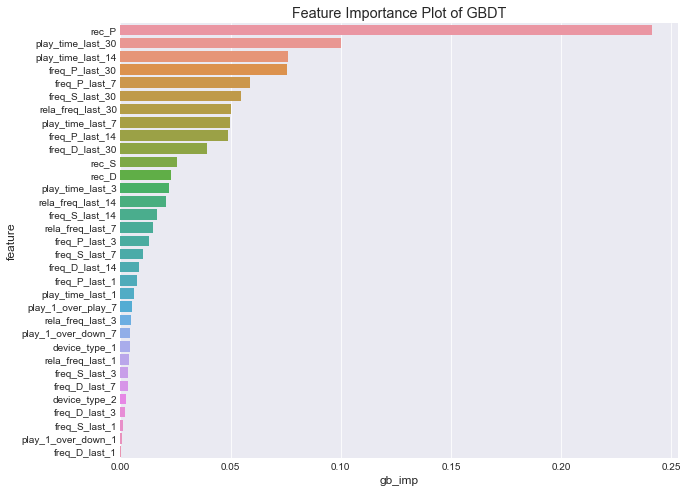

In [50]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(y = 'feature', x = 'gb_imp', 
            data = df_feature_importance.sort_values('gb_imp', ascending = False))
plt.title('Feature Importance Plot of GBDT')
plt.show()

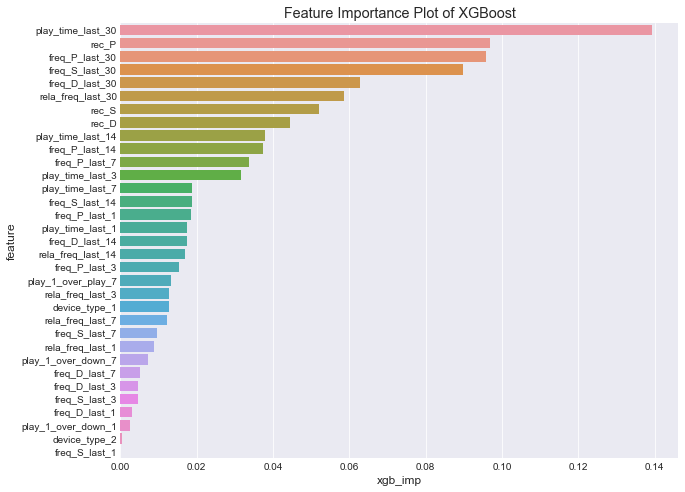

In [51]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(y = 'feature', x = 'xgb_imp', 
            data = df_feature_importance.sort_values('xgb_imp', ascending = False))
plt.title('Feature Importance Plot of XGBoost')
plt.show()

#### Comprehensive Feature Importance Plot

Populating the interactive namespace from numpy and matplotlib


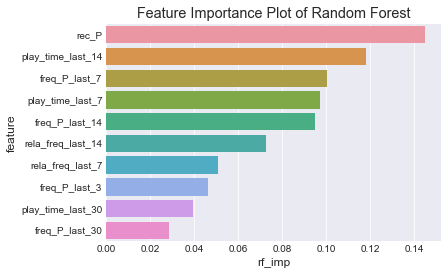

In [52]:
%pylab inline
# f, axes = plt.subplots(2, 2)
sns.set_style('darkgrid')
sns.barplot(y = 'feature', x = 'rf_imp', 
            data = df_feature_importance.sort_values('rf_imp', ascending = False).iloc[:10, :])
plt.title('Feature Importance Plot of Random Forest')
plt.show()

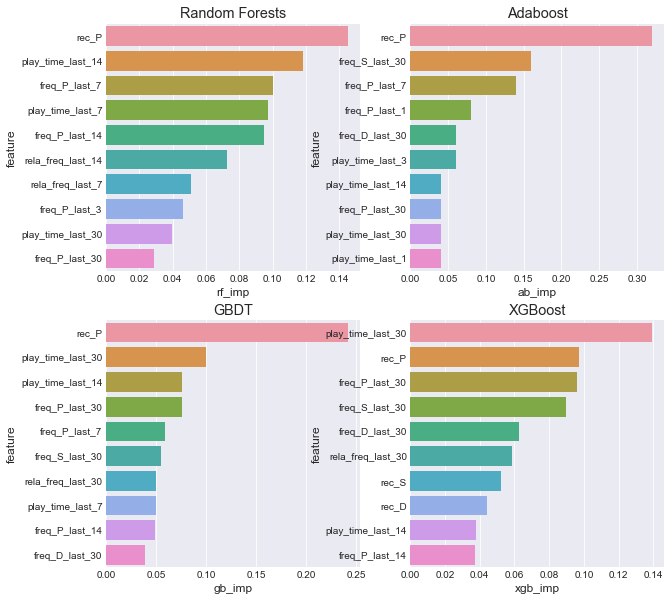

In [53]:
plt.rcParams['figure.figsize'] = [10, 10]
# plt.figure(figsize=[8, 8])
f, axes = plt.subplots(2, 2)
sns.barplot(y = 'feature', x = 'rf_imp', 
            data = df_feature_importance.sort_values('rf_imp', ascending = False).iloc[:10, :],
           ax = axes.flatten()[0])
axes.flatten()[0].set_title('Random Forests')

sns.barplot(y = 'feature', x = 'ab_imp', 
            data = df_feature_importance.sort_values('ab_imp', ascending = False).iloc[:10, :],
           ax = axes.flatten()[1])
axes.flatten()[1].set_title('Adaboost')

sns.barplot(y = 'feature', x = 'gb_imp', 
            data = df_feature_importance.sort_values('gb_imp', ascending = False).iloc[:10, :],
           ax = axes.flatten()[2])
axes.flatten()[2].set_title('GBDT')

sns.barplot(y = 'feature', x = 'xgb_imp', 
            data = df_feature_importance.sort_values('xgb_imp', ascending = False).iloc[:10, :],
           ax = axes.flatten()[3])
axes.flatten()[3].set_title('XGBoost')
plt.show()



### Second-Level model

#### (A) Majority Vote 
The simple majority voting methods improve the test AUC by $1e-4$, tiny though. 

In [54]:
# soft majority vote classifier
from sklearn.ensemble import VotingClassifier
softMV_clf = VotingClassifier(estimators=[
        ('lr', lr_best_clf), ('rf', rf_best_clf), ('ab', ab_best_clf), 
        ('gb', gb_best_clf), ('xgb', xgb_best_clf)], voting='soft')
softMV_clf = softMV_clf.fit(X_train, y_train)

/Users/LZQ/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/LZQ/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



              train      test
metrics                      
AUC        0.941986  0.933707
Accuracy   0.894521  0.877112
Precision  0.905434  0.892263
Recall     0.944963  0.931321
f1-score   0.924776  0.911374


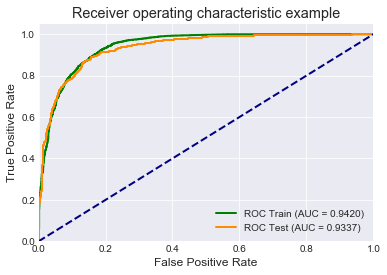

In [55]:
train_test_model(softMV_clf, X_train, y_train, X_test, y_test)

Most users of this music box are in a <font color = red>  high-risk </font> group. 

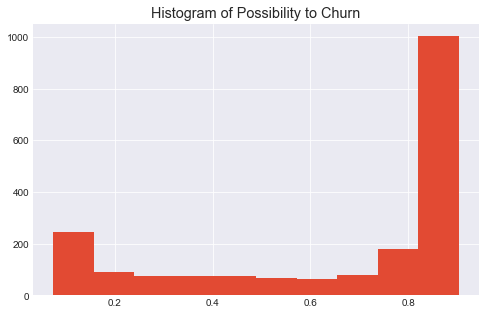

In [56]:
plt.figure(figsize=(8,5))
plt.hist(softMV_clf.predict_proba(X_test)[:, 1])
plt.title('Histogram of Possibility to Churn')
plt.show()

#### (B) Out-Of-Fold Prediction
The prediction of logistic regression, random forests, Ada-Boost, GBDT are highly correlated, as we can observe in the correlation plot below. These models behaves similarly, so are their noises. The stacking model might somehow enlarge the noise.

Therefore, the second stacking method even hurts the performance. 

In [57]:
# out-of-fold seed 
oof_seed = 102

In [58]:
lr_best_clf.predict_proba(X_train), lr_best_clf.predict(X_train)

(array([[0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        ...,
        [0.00219185, 0.99780815],
        [0.        , 1.        ],
        [0.        , 1.        ]]), array([1, 1, 1, ..., 1, 1, 1]))

In [59]:
def get_oof(clf, x_train, y_train, x_test, Nfolds = 10):
    
    ntrain = x_train.shape[0]
    ntest = x_test.shape[0]
    
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    
    oof_test_skf = np.empty((Nfolds, ntest))
    kf = StratifiedKFold(n_splits=Nfolds, random_state=oof_seed)
    kf.get_n_splits(x_train, y_train)

    for i, (train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        xtr_train = x_train.iloc[train_index]
        ytr_train = y_train.iloc[train_index]
        xtr_test = x_train.iloc[test_index]

        clf.fit(xtr_train, ytr_train)

#         oof_train[test_index] = clf.predict(xtr_test)
#         oof_test_skf[i, :] = clf.predict(x_test)
        oof_train[test_index] = clf.predict_proba(xtr_test)[:, 0]
        oof_test_skf[i, :] = clf.predict_proba(x_test)[:, 0]

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [60]:
lr_oof_train, lr_oof_test = get_oof(lr_best_clf, X_train, y_train, X_test)
rf_oof_train, rf_oof_test = get_oof(rf_best_clf, X_train, y_train, X_test)
ab_oof_train, ab_oof_test = get_oof(ab_best_clf, X_train, y_train, X_test)
gb_oof_train, gb_oof_test = get_oof(gb_best_clf, X_train, y_train, X_test)
# xgb_oof_train, xgb_oof_test = get_oof(xgb_best_clf, X_train, y_train, X_test)

In [61]:
np.sum(rf_oof_test == 0)

0

#####  Correlation of Predictions of Models

In [62]:
base_predictions_train = pd.DataFrame( {'lr': lr_oof_train.ravel(),
     'rf': rf_oof_train.ravel(),
     'ab': ab_oof_train.ravel(),
     'gb': gb_oof_train.ravel()
     #'xgb': xgb_oof_train.ravel()                                   
    })

In [63]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [64]:
X_train_sec = np.concatenate([lr_oof_train, rf_oof_train, ab_oof_train, gb_oof_train], axis=1)
X_test_sec = np.concatenate([lr_oof_test, rf_oof_test, ab_oof_test, gb_oof_test], axis=1)

In [65]:
print('Training data of second-level model is: \n', X_train_sec, 
      '\n Test data of second-level model is: \n', X_test_sec)

Training data of second-level model is: 
 [[0.50850377 0.62383143 0.49462317 0.73085766]
 [0.0368577  0.03659546 0.35364844 0.03624093]
 [0.03687779 0.03440812 0.35364844 0.0354734 ]
 ...
 [0.8571085  0.97346765 0.61776764 0.96234285]
 [0.5589636  0.69349799 0.54209446 0.73591569]
 [0.831025   0.91676749 0.57442802 0.91177202]] 
 Test data of second-level model is: 
 [[0.06896049 0.09842769 0.37492279 0.08968459]
 [0.75376486 0.82875218 0.57296644 0.83134665]
 [0.11761064 0.2162426  0.41947282 0.21149311]
 ...
 [0.99988529 0.98205369 0.67241007 0.97259471]
 [0.15158829 0.21866155 0.4211202  0.24167889]
 [0.05404933 0.02778099 0.35930439 0.03336881]]


#####  Second-level Model 

###### Xgboost

In [66]:
xgb_param_grid_sec = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 6],
    'learning_rate': [.05, .1, .15],
    'gamma': [.9],
    'subsample': [.8, .9],
    'colsample_bytree': [.2, .5, .8],
    'n_jobs': [-1],
    'seed': [103]
}

xgb_grid_clf_sec = XGBClassifier()

# Run the grid search
# read theory
xgb_grid_obj_sec = GridSearchCV(xgb_grid_clf_sec, xgb_param_grid_sec, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid_obj_sec.fit(X_train_sec, y_train)


# Set the clf to the best combination of parameters
xgb_best_clf_sec = xgb_grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_best_clf_sec.fit(X_train_sec, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=0.9)

In [67]:
xgb_man_param_sec = {'n_estimators': 50,
                     'max_depth': 3,
                     'learning_rate': .15,
                     'gamma': .9,
                     'subsample': .8,
                     'colsample_bytree': .2,
                     'n_jobs': -1,
                     'seed': 103
                    }

xgb_man_clf_sec = XGBClassifier(**xgb_man_param_sec)
xgb_man_clf_sec.fit(X_train_sec, y_train)

# Train test model
cross_val_score(xgb_man_clf_sec, X_train_sec, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9142515348617485

In [68]:
cross_val_score(xgb_best_clf_sec, X_train_sec, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.9137474382782873

In [69]:
xgb_best_clf_sec.predict(X_train_sec)

/Users/LZQ/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



array([0, 1, 1, ..., 0, 0, 0])

/Users/LZQ/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/LZQ/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/LZQ/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/LZQ/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in 

              train      test
metrics                      
AUC        0.846546  0.848158
Accuracy   0.873528  0.873528
Precision  0.898905  0.896907
Recall     0.919030  0.919245
f1-score   0.908856  0.907939


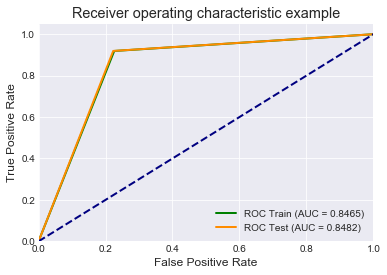

In [70]:
get_performance_metrics(y_train, xgb_best_clf_sec.predict(X_train_sec), 
                        y_test, xgb_best_clf_sec.predict(X_test_sec))
plot_roc_curve(y_train, xgb_best_clf_sec.predict(X_train_sec), 
               y_test, xgb_best_clf_sec.predict(X_test_sec))